# Analysie nematic ordering of cells
use anaysis_env
### Load packages


In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd 

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# File and OS operations
import os
import scipy.io as sio

# Statistical analysis
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp

# Custom functions 
import Analysis_tools as at

### Specify parameters

In [2]:
main_dr = "/media/felix/Felixdrive/HUVEC_direct/nematic_ordering/CellEdgesAll"
folder_names = ["Control", "Infected", "Uninfected"]

windowsize = 125
factor_px_to_um = 0.2767889
factor_px_to_um_SDCM = 0.3478664
windowsize_SDCM = 157
av_cell_size_um2 = 1.1 * 10**3 

remove_files = ["23032023_Control_001.tif",
                "21022024_Direct_Infected_002.tif",
                "23032023_Direct_Infected_002.tif",
                "23032023_Direct_Uninfected_001.tif",
                "25032024_Direct_Uninfected_001.tif",
                "21022024_Indirect_Infected_002.tif",
                "25032024_Indirect_Infected_003.tif",
                "23032023_Indirect_Uninfected_007.tif"]
replicates_to_use = None #['25012024', '29042023'] # Specifiy if only some replicates should be used. When useing all replicates, set to None


#### Colormap

In [3]:
# Base colors for "Direct" conditions
base_colors = {
    'Control': '#7c8083',  # Control group color
    'Infected': '#67001f',  # Original Infected color
    'Uninfected': '#e41a1c'  # Original Uninfected color
}

# Generate lighter versions for "Indirect" conditions
custom_palette_5 = {
    'Control': base_colors['Control'],
    'Direct_Uninfected': base_colors['Uninfected'],
    'Direct_Infected': base_colors['Infected'],
    'Indirect_Uninfected': sns.light_palette(mcolors.to_rgb(base_colors['Uninfected']), n_colors=3)[1],  # Lighter Uninfected color
    'Indirect_Infected': sns.light_palette(mcolors.to_rgb(base_colors['Infected']), n_colors=3)[1],  # Lighter Infected color
}

### Load Data

#### Load nematic ordering data

In [4]:
df_combined, neighbourhood_um = at.load_and_process_matlab_data(main_dr=main_dr,
                                                                folder_names=folder_names,
                                                                windowsize=windowsize,
                                                                factor_px_to_um=factor_px_to_um,
                                                                av_cell_size_um2=av_cell_size_um2,
                                                                remove_files=remove_files,
                                                                replicates_to_use=replicates_to_use,
                                                                cell_count_path=None)
df_combined

/media/felix/Felixdrive/Coding/Analysis_Felix/Analysis_tools.py:149: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  array = np.arange(int(parameters_df['min_winsize_px']), int(parameters_df['max_winsize_px']+parameters_df['winsize_int_px']), int(parameters_df['winsize_int_px']))
/media/felix/Felixdrive/Coding/Analysis_Felix/Analysis_tools.py:149: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  array = np.arange(int(parameters_df['min_winsize_px']), int(parameters_df['max_winsize_px']+parameters_df['winsize_int_px']), int(parameters_df['winsize_int_px']))


,File name,replicate,Neighbourhood,Order parameter,Group,Radial Distance (µm),Window size (um2),Cells_per_neighbourhood
0,20230324_CellEdges__glass_unexp_1_.tif,20230324,3x,0.375322,Control,17,1156,1.050909
1,20230324_CellEdges__glass_unexp_1_001.tif,20230324,3x,0.372707,Control,17,1156,1.050909
2,20230324_CellEdges__glass_unexp_1_002.tif,20230324,3x,0.394922,Control,17,1156,1.050909
3,20230324_CellEdges__glass_unexp_1_003.tif,20230324,3x,0.452704,Control,17,1156,1.050909
4,20230324_CellEdges__glass_unexp_1_004.tif,20230324,3x,0.428292,Control,17,1156,1.050909
...,...,...,...,...,...,...,...,...
820,20230324_CellEdges__glass_uninf_3_.tif,20230324,23x,0.402374,Uninfected,190,144400,131.272727
821,20230324_CellEdges__glass_uninf_3_001.tif,20230324,23x,0.123381,Uninfected,190,144400,131.272727
822,20230324_CellEdges__glass_uninf_3_002.tif,20230324,23x,0.185901,Uninfected,190,144400,131.272727
823,20230324_CellEdges__glass_uninf_3_003.tif,20230324,23x,0.456484,Uninfected,190,144400,131.272727


In [9]:
excel_path = os.path.join(main_dr, 'df_combined.csv')
df_combined.to_csv(excel_path, index=False)

In [ ]:
## Temp: Add my own replicate
my_data = pd.read_csv('/media/felix/Felixdrive/HUVEC_direct/nematic_ordering/CellEdgesAll/df_combined.csv')
my_data.rename(columns={'repicate': 'replicate'}, inplace=True)
my_data = my_data[my_data['Window size'] == windowsize].reset_index(drop=True)
my_data['Radial Distance (µm)'] = my_data['Neighbourhood'].apply(lambda x: int(int(x[:-1]) * 17.2993063))
my_data['Window size (um2)'] = (my_data['Radial Distance (µm)'] * 2) **2
my_data.head(12)

,Window size,Neighborhood radius,Order parameter,Image,Date,Group,Replicate,True_Winsize,Neighbourhood,File name,replicate,Radial Distance (µm),Window size (um2),Cells_per_neighbourhood
0,125,1,0.470462,/media/felix/Felixdrive/Analysis2025/20250109_...,20250109,Control,1,157,1x,20250109_Control_01_seg.npy,20250109,17,1156,NaN
1,125,2,0.303363,/media/felix/Felixdrive/Analysis2025/20250109_...,20250109,Control,1,157,2x,20250109_Control_01_seg.npy,20250109,34,4624,NaN
2,125,3,0.247149,/media/felix/Felixdrive/Analysis2025/20250109_...,20250109,Control,1,157,3x,20250109_Control_01_seg.npy,20250109,51,10404,NaN
3,125,4,0.240970,/media/felix/Felixdrive/Analysis2025/20250109_...,20250109,Control,1,157,4x,20250109_Control_01_seg.npy,20250109,69,19044,NaN
4,125,5,0.244222,/media/felix/Felixdrive/Analysis2025/20250109_...,20250109,Control,1,157,5x,20250109_Control_01_seg.npy,20250109,86,29584,NaN
5,125,6,0.245438,/media/felix/Felixdrive/Analysis2025/20250109_...,20250109,Control,1,157,6x,20250109_Control_01_seg.npy,20250109,103,42436,NaN
6,125,7,0.239669,/media/felix/Felixdrive/Analysis2025/20250109_...,20250109,Control,1,157,7x,20250109_Control_01_seg.npy,20250109,121,58564,NaN
7,125,8,0.231482,/media/felix/Felixdrive/Analysis2025/20250109_...,20250109,Control,1,157,8x,20250109_Control_01_seg.npy,20250109,138,76176,NaN
8,125,9,0.236649,/media/felix/Felixdrive/Analysis2025/20250109_...,20250109,Control,1,157,9x,20250109_Control_01_seg.npy,20250109,155,96100,NaN
9,125,10,0.197884,/media/felix/Felixdrive/Analysis2025/20250109_...,20250109,Control,1,157,10x,20250109_Control_01_seg.npy,20250109,172,118336,NaN


In [26]:
df_all = pd.concat([df_combined, my_data], axis=0, join='outer', ignore_index=True)
df_save = df_all.dropna(axis=1)
df_save

,File name,replicate,Neighbourhood,Order parameter,Group,Radial Distance (µm),Window size (um2)
0,25042023_Control_003.tif,25042023,3x,0.332892,Control,17,1156
1,25042023_Control_001.tif,25042023,3x,0.371986,Control,17,1156
2,25042023_Control_002.tif,25042023,3x,0.500056,Control,17,1156
3,25042023_RFPHUVECS_Control_001.tif,25042023_RFP,3x,0.663163,Control,17,1156
4,25042023_RFPHUVECS_Control_002.tif,25042023_RFP,3x,0.497799,Control,17,1156
...,...,...,...,...,...,...,...
1205,20250109_Indirect_Uninfected_05_seg.npy,20250109,7x,-0.014916,Indirect_Uninfected,121,58564
1206,20250109_Indirect_Uninfected_05_seg.npy,20250109,8x,-0.018921,Indirect_Uninfected,138,76176
1207,20250109_Indirect_Uninfected_05_seg.npy,20250109,9x,0.036828,Indirect_Uninfected,155,96100
1208,20250109_Indirect_Uninfected_05_seg.npy,20250109,10x,0.101778,Indirect_Uninfected,172,118336


In [30]:
df_pivot = df_save.pivot_table(index=['File name','replicate', 'Neighbourhood', 'Radial Distance (µm)', 'Window size (um2)'], columns='Group', values='Order parameter')
df_pivot.reset_index(inplace=True)
df_pivot

Group,File name,replicate,Neighbourhood,Radial Distance (µm),Window size (um2),Control,Direct_Infected,Direct_Uninfected,Indirect_Infected,Indirect_Uninfected
0,20250109_Control_01_seg.npy,20250109,10x,172,118336,0.197884,NaN,NaN,NaN,NaN
1,20250109_Control_01_seg.npy,20250109,11x,190,144400,-0.165873,NaN,NaN,NaN,NaN
2,20250109_Control_01_seg.npy,20250109,1x,17,1156,0.470462,NaN,NaN,NaN,NaN
3,20250109_Control_01_seg.npy,20250109,2x,34,4624,0.303363,NaN,NaN,NaN,NaN
4,20250109_Control_01_seg.npy,20250109,3x,51,10404,0.247149,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1205,29042023_Indirect_Uninfected_003.tif,29042023,23x,190,144400,NaN,NaN,NaN,NaN,0.213859
1206,29042023_Indirect_Uninfected_003.tif,29042023,3x,17,1156,NaN,NaN,NaN,NaN,0.765965
1207,29042023_Indirect_Uninfected_003.tif,29042023,5x,34,4624,NaN,NaN,NaN,NaN,0.656301
1208,29042023_Indirect_Uninfected_003.tif,29042023,7x,51,10404,NaN,NaN,NaN,NaN,0.558576


In [31]:

save_path = '/media/felix/Felixdrive/Analysis2025/Indirect_all'
df_pivot.to_csv(os.path.join(save_path, '20250211_ALL_Direct_Indirect_expose_Order_parameters_wide.csv'), index=False)

### Statistics

In [5]:
kruskal_results, conover_df = at.perform_kruskal_conover(df_combined, value_col='Order parameter', group_col='Group', neighbourhood_col='Neighbourhood')
conover_df

,Neighbourhood,Comparison,p-value,Significance
0,3x,Control - Direct_Infected,0.002721,**
1,3x,Control - Direct_Uninfected,0.833045,ns
2,3x,Control - Indirect_Infected,0.129273,ns
3,3x,Control - Indirect_Uninfected,0.104222,ns
4,3x,Direct_Infected - Direct_Uninfected,0.084748,ns
...,...,...,...,...
105,23x,Direct_Infected - Indirect_Infected,1.000000,ns
106,23x,Direct_Infected - Indirect_Uninfected,1.000000,ns
107,23x,Direct_Uninfected - Indirect_Infected,1.000000,ns
108,23x,Direct_Uninfected - Indirect_Uninfected,1.000000,ns


### Visualize

In [5]:
my_data = pd.read_csv('/media/felix/Felixdrive/HUVEC_direct/nematic_ordering/CellEdgesAll/df_combined.csv')
# get number of rows per group
my_data[my_data['Neighbourhood']=='3x']['Group'].value_counts()

Group
Infected      29
Control       23
Uninfected    23
Name: count, dtype: int64

/media/felix/Felixdrive/Coding/Analysis_Felix/Analysis_tools.py:373: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x=unit, y=value_col, hue=group_col, data=df,
/media/felix/Felixdrive/Coding/Analysis_Felix/Analysis_tools.py:373: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=unit, y=value_col, hue=group_col, data=df,
/media/felix/Felixdrive/Coding/Analysis_Felix/Analysis_tools.py:373: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x=unit, y=value_col, hue=group_col, data=df,
/media/felix/Felixdrive/Coding/Analysis_Felix/Analysis_tools.py:373: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.

[-0.9826589595375722, 1.907514450867052, 4.797687861271676, 7.687861271676301, 10.578034682080926]


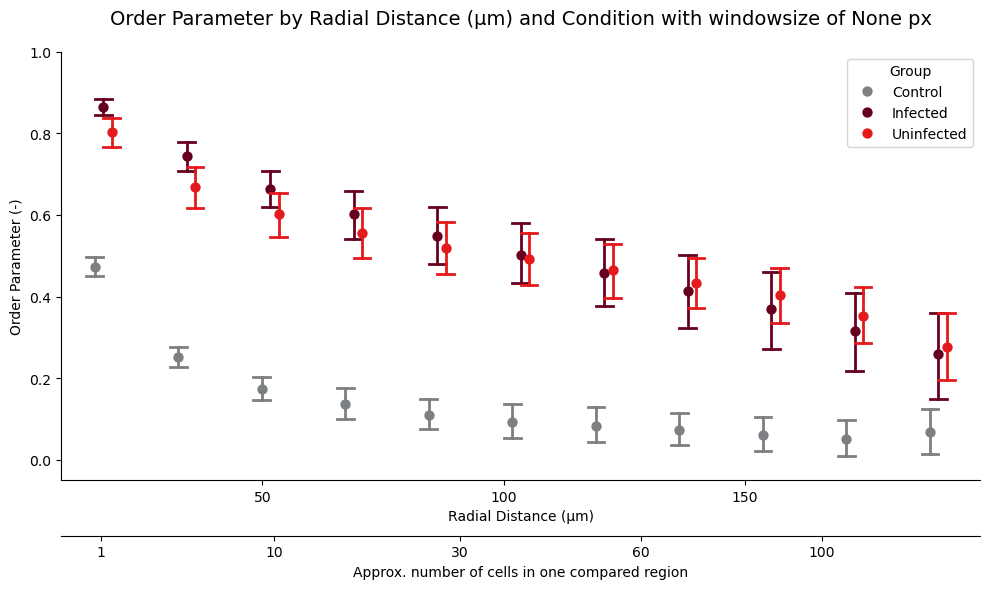

In [5]:
fig = at.plot_by_windowsize(my_data,
                         unit='Radial Distance (µm)', group_col='Group', value_col='Order parameter',  
                         custom_palette=base_colors, group_order = None, doge_condtions=0.2, y_axis_lim=(-0.05,1.0),
                         start_at=0, show_raw_data = False,
                         secondary_label_col='Cells_per_neighbourhood', second_label_pos=40, av_cell_size_um2=av_cell_size_um2)


In [6]:
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig('/media/felix/Felixdrive/HUVEC_direct/nematic_ordering/CellEdgesAll/nem_order.svg', format='svg', dpi=300)


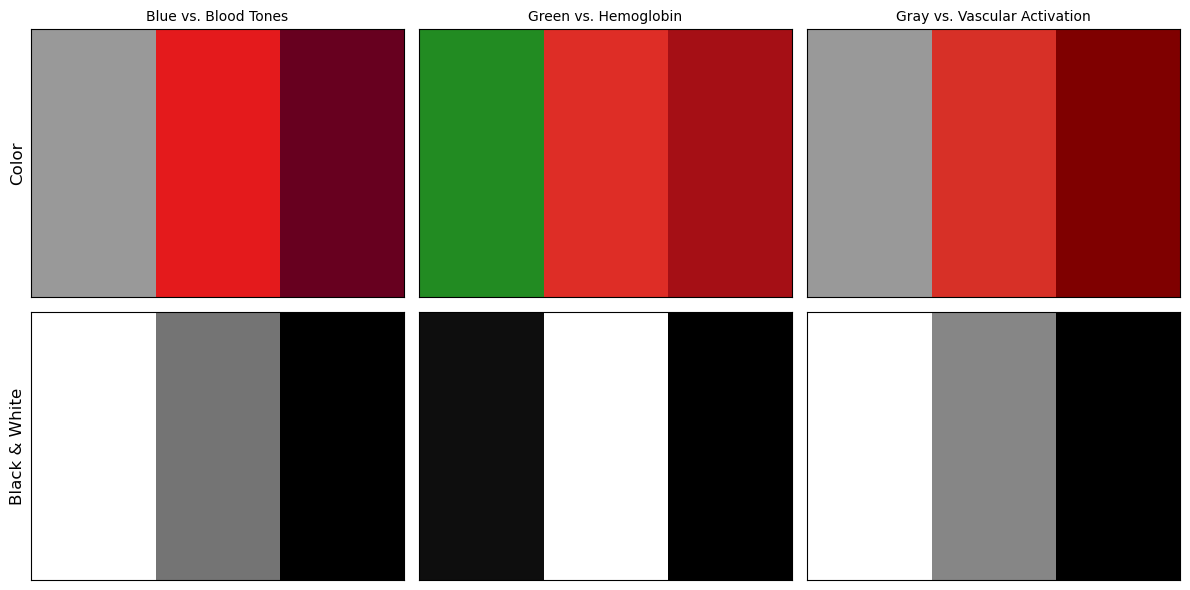

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define color palettes with corrected green
palettes = {
    "Blue vs. Blood Tones": ["#999999", "#e41a1c", "#67001f"],
    "Green vs. Hemoglobin": ["#228B22", "#de2d26", "#a50f15"],  # True green
    "Gray vs. Vascular Activation": ["#999999", "#d73027", "#7f0000"]
}

# Create figure for color and grayscale comparison
fig, axes = plt.subplots(2, len(palettes), figsize=(12, 6))

for i, (title, colors) in enumerate(palettes.items()):
    # Convert hex to RGB for color display
    rgb_colors = [mcolors.hex2color(c) for c in colors]
    img_color = np.array([rgb_colors])  # Shape (1, N, 3) for imshow

    # Convert RGB to grayscale using luminosity method: Gray = 0.2989*R + 0.5870*G + 0.1140*B
    img_gray = np.dot(img_color[0], [0.1, 0.1, 0.1])  # Single intensity per color
    img_gray = np.array([[img_gray] * 3]).transpose(1, 2, 0)  # Convert to RGB-like shape

    # Plot color version
    axes[0, i].imshow(img_color, aspect="auto")
    axes[0, i].set_title(title, fontsize=10)
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks([])

    # Plot grayscale version
    axes[1, i].imshow(img_gray, aspect="auto", cmap="gray")
    axes[1, i].set_xticks([])
    axes[1, i].set_yticks([])

axes[0, 0].set_ylabel("Color", fontsize=12)
axes[1, 0].set_ylabel("Black & White", fontsize=12)

plt.tight_layout()
plt.show()


In [16]:
fig.savefig(os.path.join(save_path, f'2025_02_04_order_parameter_indirect_doge_conditions.svg'))

In [17]:
# Without legend
fig.gca().get_legend().set_visible(False) 
fig.savefig(os.path.join(save_path, f'2025_02_04_order_parameter_indirect_doge_conditions_without_Lables.svg'))


/tmp/ipykernel_13550/2126141661.py:145: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x=unit, y=value_col, hue=group_col, data=df_combined,
/tmp/ipykernel_13550/2126141661.py:145: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=unit, y=value_col, hue=group_col, data=df_combined,
/tmp/ipykernel_13550/2126141661.py:145: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x=unit, y=value_col, hue=group_col, data=df_combined,
/tmp/ipykernel_13550/2126141661.py:145: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.pointplot(x=unit, y=value_col, hue=

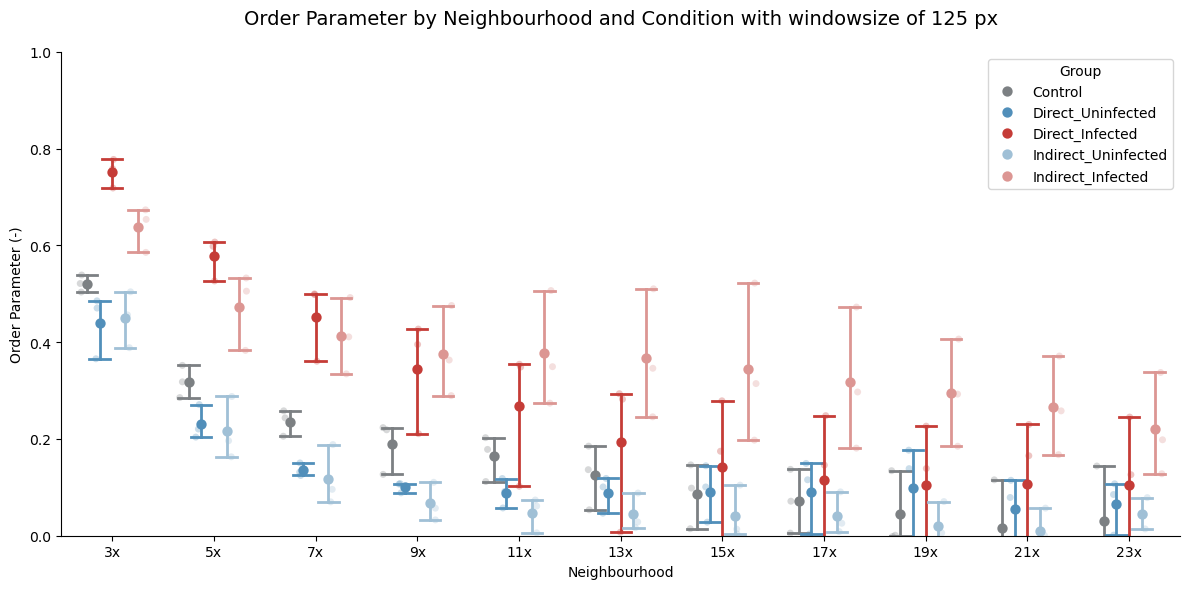

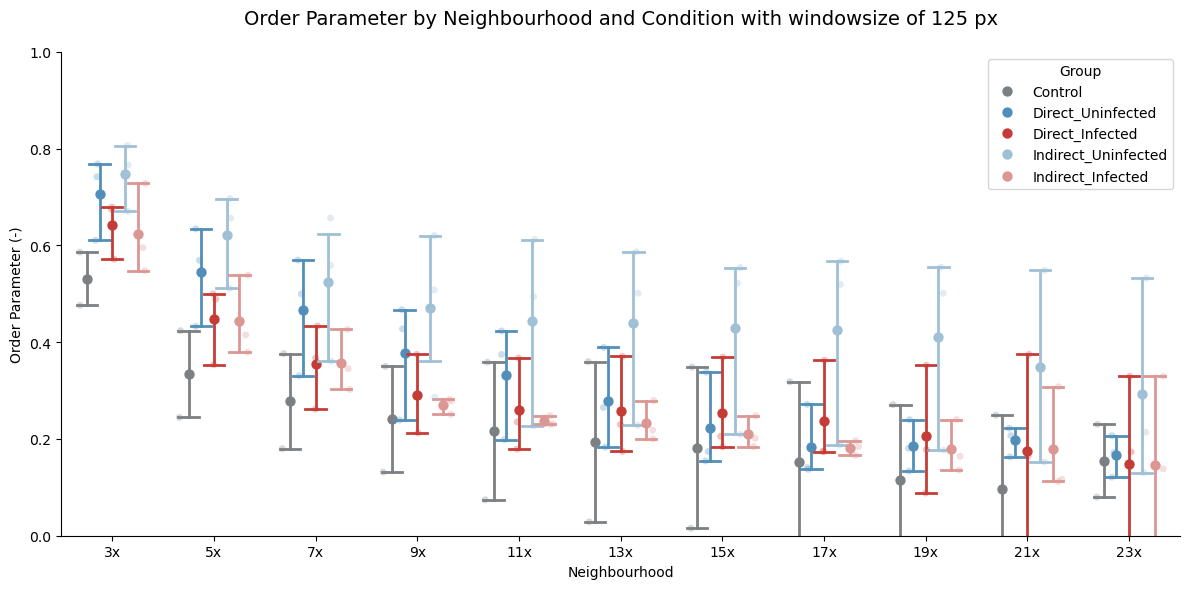

In [52]:
# Add statistical annotations to the plot
# Loop through each replicate and create a plot
for rep in df_combined['replicate'].unique():
    subset = df_combined[df_combined['replicate'] == rep]
    
    # Add statistical annotations to the plot
    fig = plot_by_windowsize(subset, windowsize,
                             unit='Neighbourhood', group_col='Group', value_col='Order parameter', replicate_col='replicate', 
                             custom_palette=custom_palette_5, group_order=None, 
                             start_at=0, show_raw_data=True,
                             secondary_label_col='Cells_per_neighbourhood', second_label_pos=None)
    
    # Save the figure
    fig.savefig(os.path.join(main_dr, 'Analysis', f'2024_11_29_order_parameter_windowsize_{windowsize}_replicate_{rep}_raw_data.svg'))


In [10]:
conover_df.to_csv(os.path.join(main_dr, 'statistics_results.csv'), index=False)

/tmp/ipykernel_25111/838912665.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x=unit, y='Order parameter', hue='Group', data=df_combined,
/tmp/ipykernel_25111/838912665.py:42: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=unit, y='Order parameter', hue='Group', data=df_combined,
/tmp/ipykernel_25111/838912665.py:42: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x=unit, y='Order parameter', hue='Group', data=df_combined,
/tmp/ipykernel_25111/838912665.py:42: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.pointplot(x=unit, y='Orde

[  1   4   9  17  27  39  53  69  87 108 131]


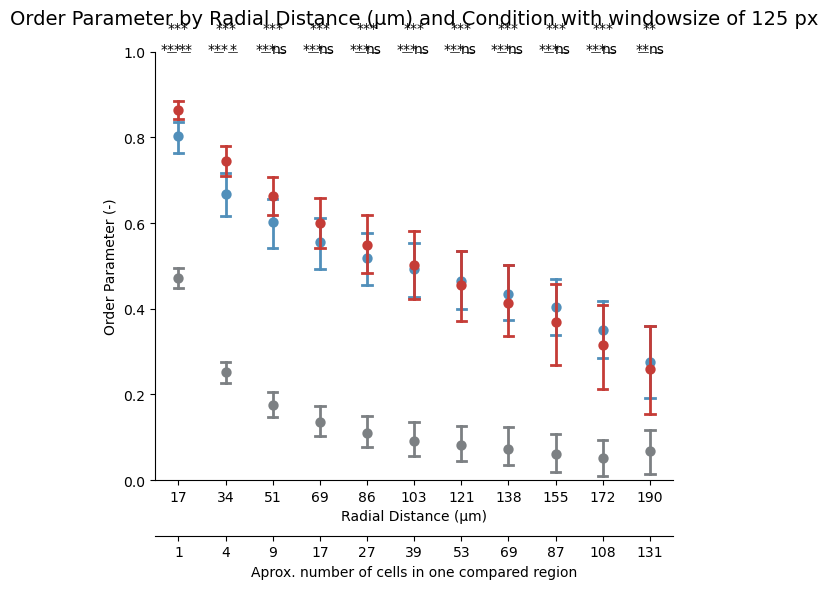

In [11]:
# Add statistical annotations to the plot
fig = plot_by_windowsize(df_combined, neighbourhood_um, windowsize, unit='Radial Distance (µm)',
                         start_at=0, second_label_pos = 40)
fig.gca().get_legend().set_visible(False) 
fig = add_stat_annotation(fig, conover_df, start_at=0)


In [12]:
fig.savefig(os.path.join(main_dr, folderName_1, 'output_parameter_search', f'2024_11_22_order_parameter_windowsize_{windowsize}_ymin_-0_3.svg'), dpi=300)
fig.savefig(os.path.join(main_dr, folderName_2, 'output_parameter_search', f'2024_11_22_order_parameter_windowsize_{windowsize}_ymin_-0_3.svg'), dpi=300)
fig.savefig(os.path.join(main_dr, folderName_3, 'output_parameter_search', f'2024_11_22_order_parameter_windowsize_{windowsize}_ymin_-0_3.svg'), dpi=300)

fig.savefig(os.path.join(main_dr, folderName_1, 'output_parameter_search', f'2024_11_22_order_parameter_windowsize_{windowsize}_ymin_-0_3.eps'), dpi=300)
fig.savefig(os.path.join(main_dr, folderName_2, 'output_parameter_search', f'2024_11_22_order_parameter_windowsize_{windowsize}_ymin_-0_3.eps'), dpi=300)
fig.savefig(os.path.join(main_dr, folderName_3, 'output_parameter_search', f'2024_11_22_order_parameter_windowsize_{windowsize}_ymin_-0_3.eps'), dpi=300)

# Cell cunt vs order parameter by neighborhood condition

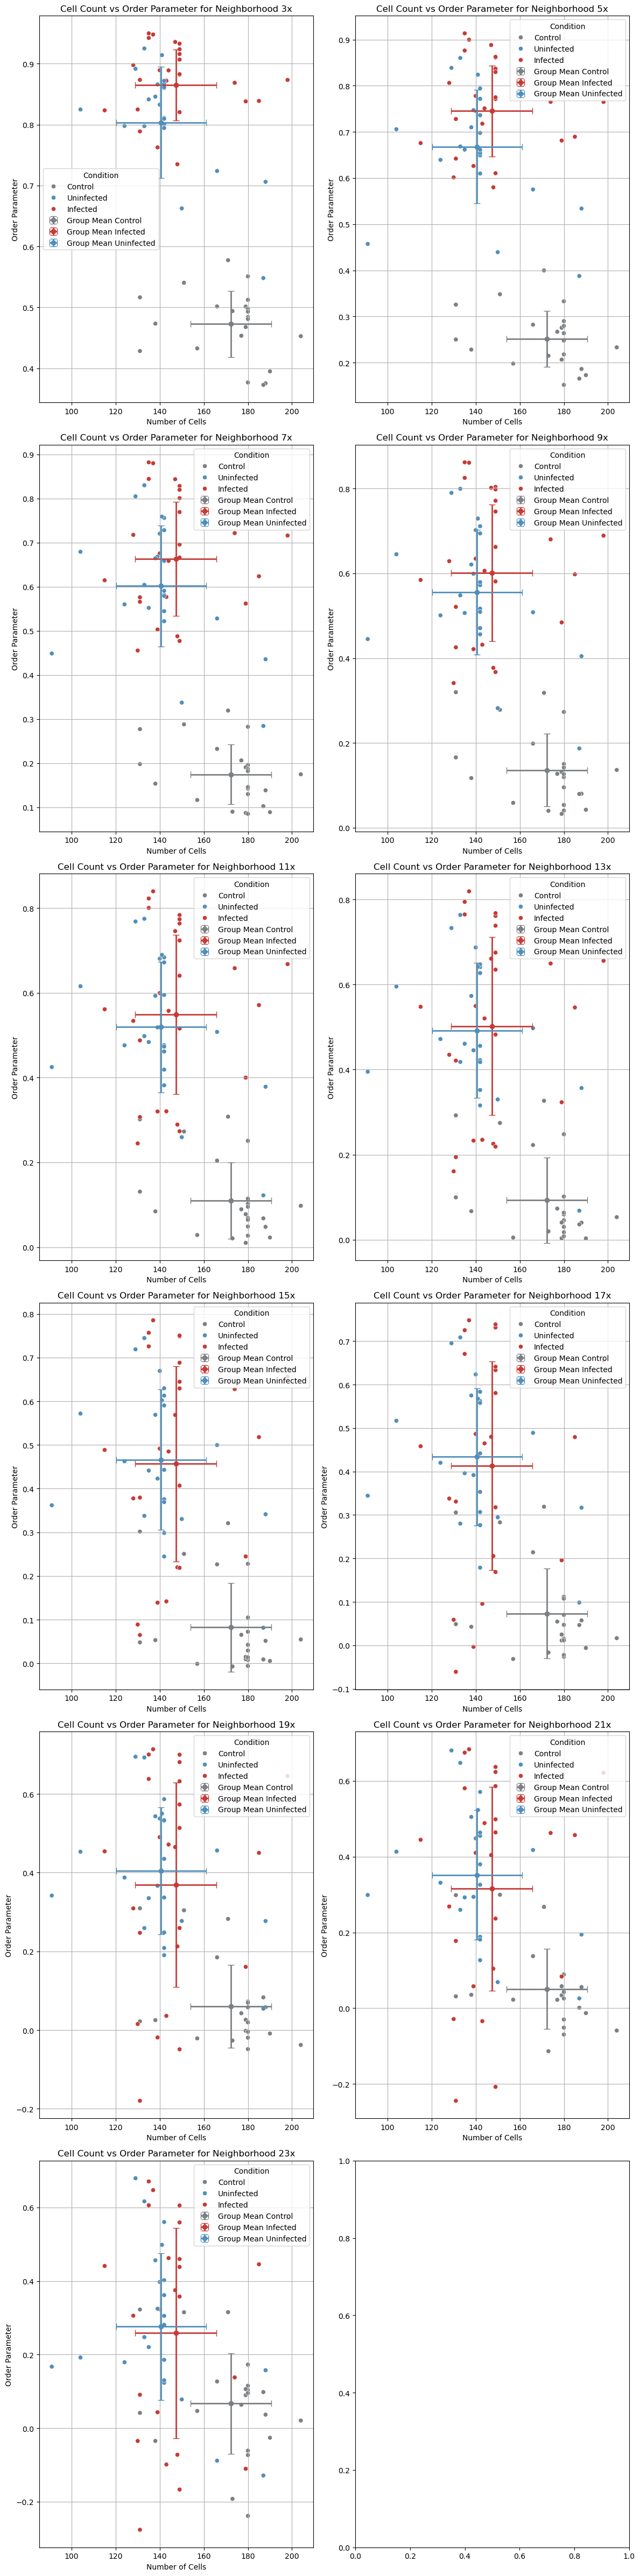

In [13]:
# Get unique neighborhoods
neighborhoods = df_combined['Neighbourhood'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(neighborhoods) // 2 + len(neighborhoods) % 2, ncols=2, figsize=(12, 8 * (len(neighborhoods) // 2 + len(neighborhoods) % 2)))
axes = axes.flatten()
custom_palette = {
    'Control': '#7c8083',      # Control group color
    'Infected': '#c53c37',     # Infected group color
    'Uninfected': '#518fba'    # Uninfected group color
}
group_order = ['Control', 'Uninfected', 'Infected']

# Loop through each neighborhood and create a plot
for ax, neighborhood in zip(axes, neighborhoods):
    subset = df_combined[df_combined['Neighbourhood'] == neighborhood]
    
    # Scatter plot
    sns.scatterplot(data=subset, x='Number of cells', y='Order parameter', hue='Group', hue_order=group_order,
                palette=custom_palette, ax=ax)
    
    # Line plot
    #sns.lineplot(data=subset, x='Number of cells', y='Order parameter', hue='Group', palette='deep', legend=False, ax=ax)
    
    # Calculate mean and standard deviation for error bars
    
    # Add error bars
    for group in subset['Group'].unique():
        group_mask = subset[subset['Group'] == group]
        mean_x = np.mean(group_mask['Number of cells'])
        mean_y = np.mean(group_mask['Order parameter'])
        std_x = np.std(group_mask['Number of cells'])
        std_y= np.std(group_mask['Order parameter'])

        ax.errorbar(mean_x, mean_y, xerr=std_x, yerr=std_y, fmt='o', color=custom_palette[group], 
                ecolor=custom_palette[group], elinewidth=2, capsize=4, label=f'Group Mean {group}')

    
    # Customize the plot
    ax.set_title(f'Cell Count vs Order Parameter for Neighborhood {neighborhood}')
    ax.set_xlabel('Number of Cells')
    ax.set_ylabel('Order Parameter')
    ax.legend(title='Condition')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

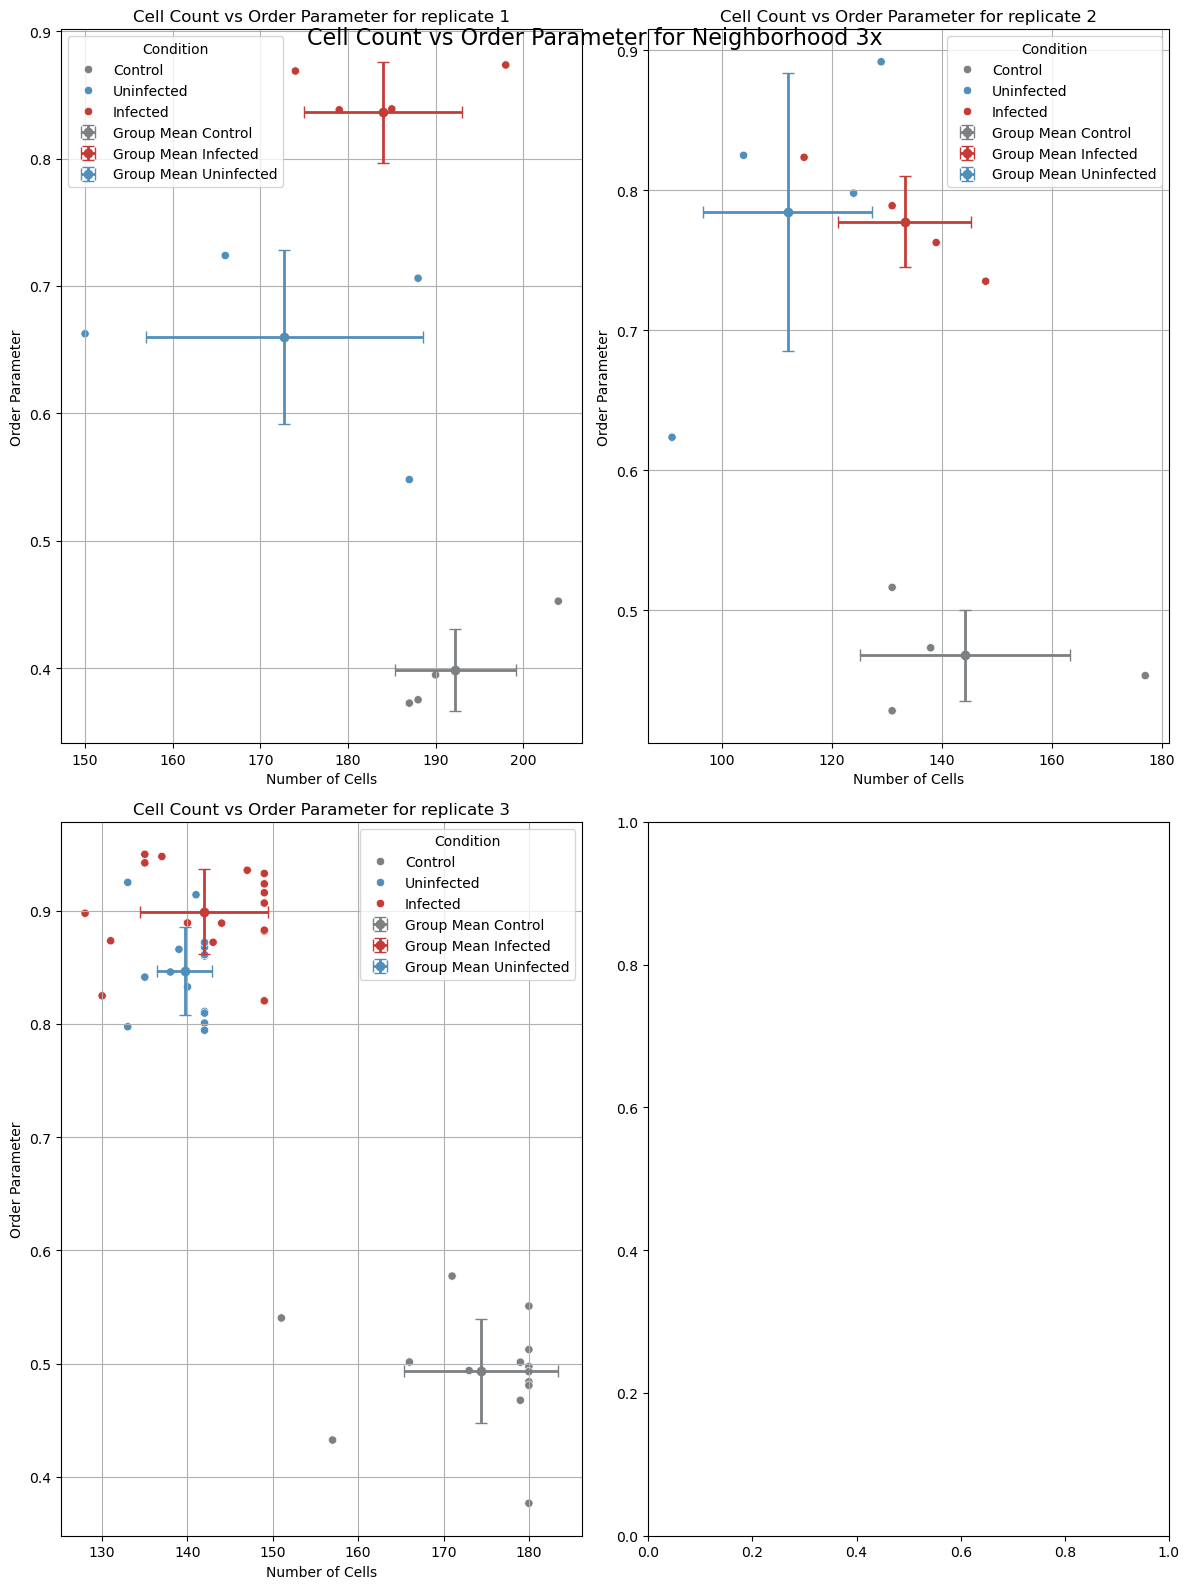

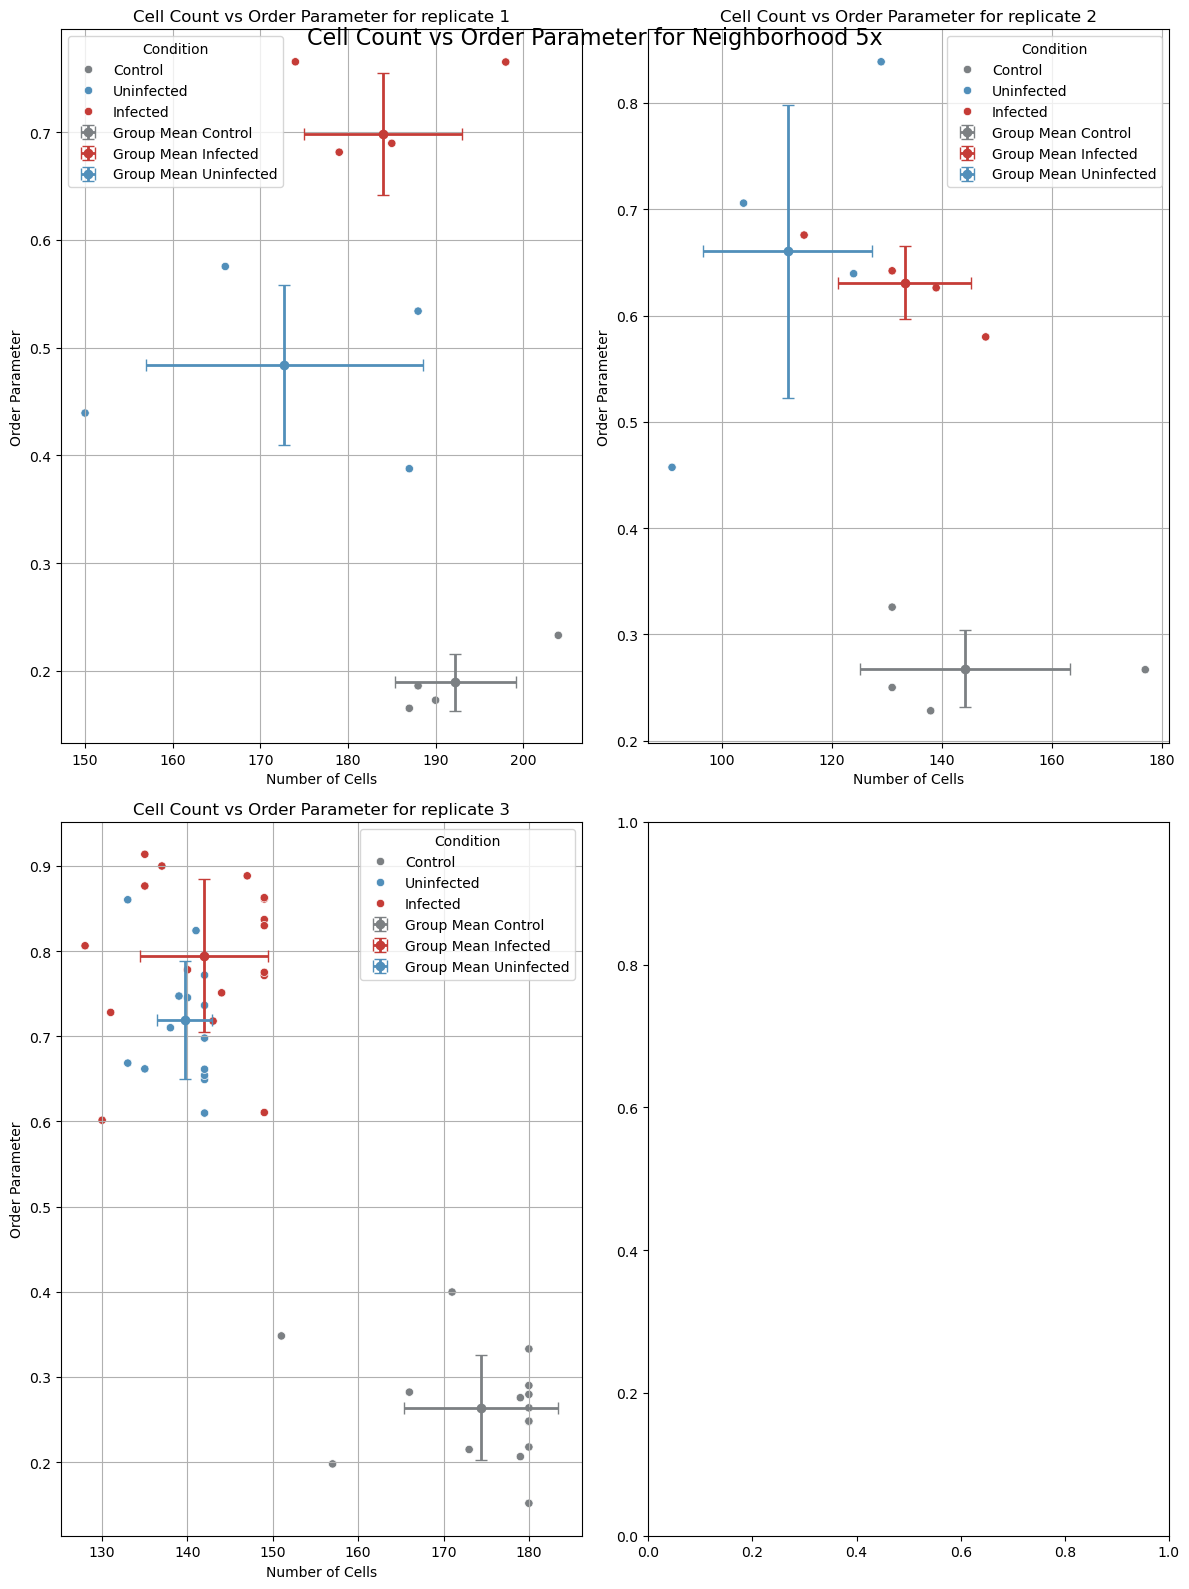

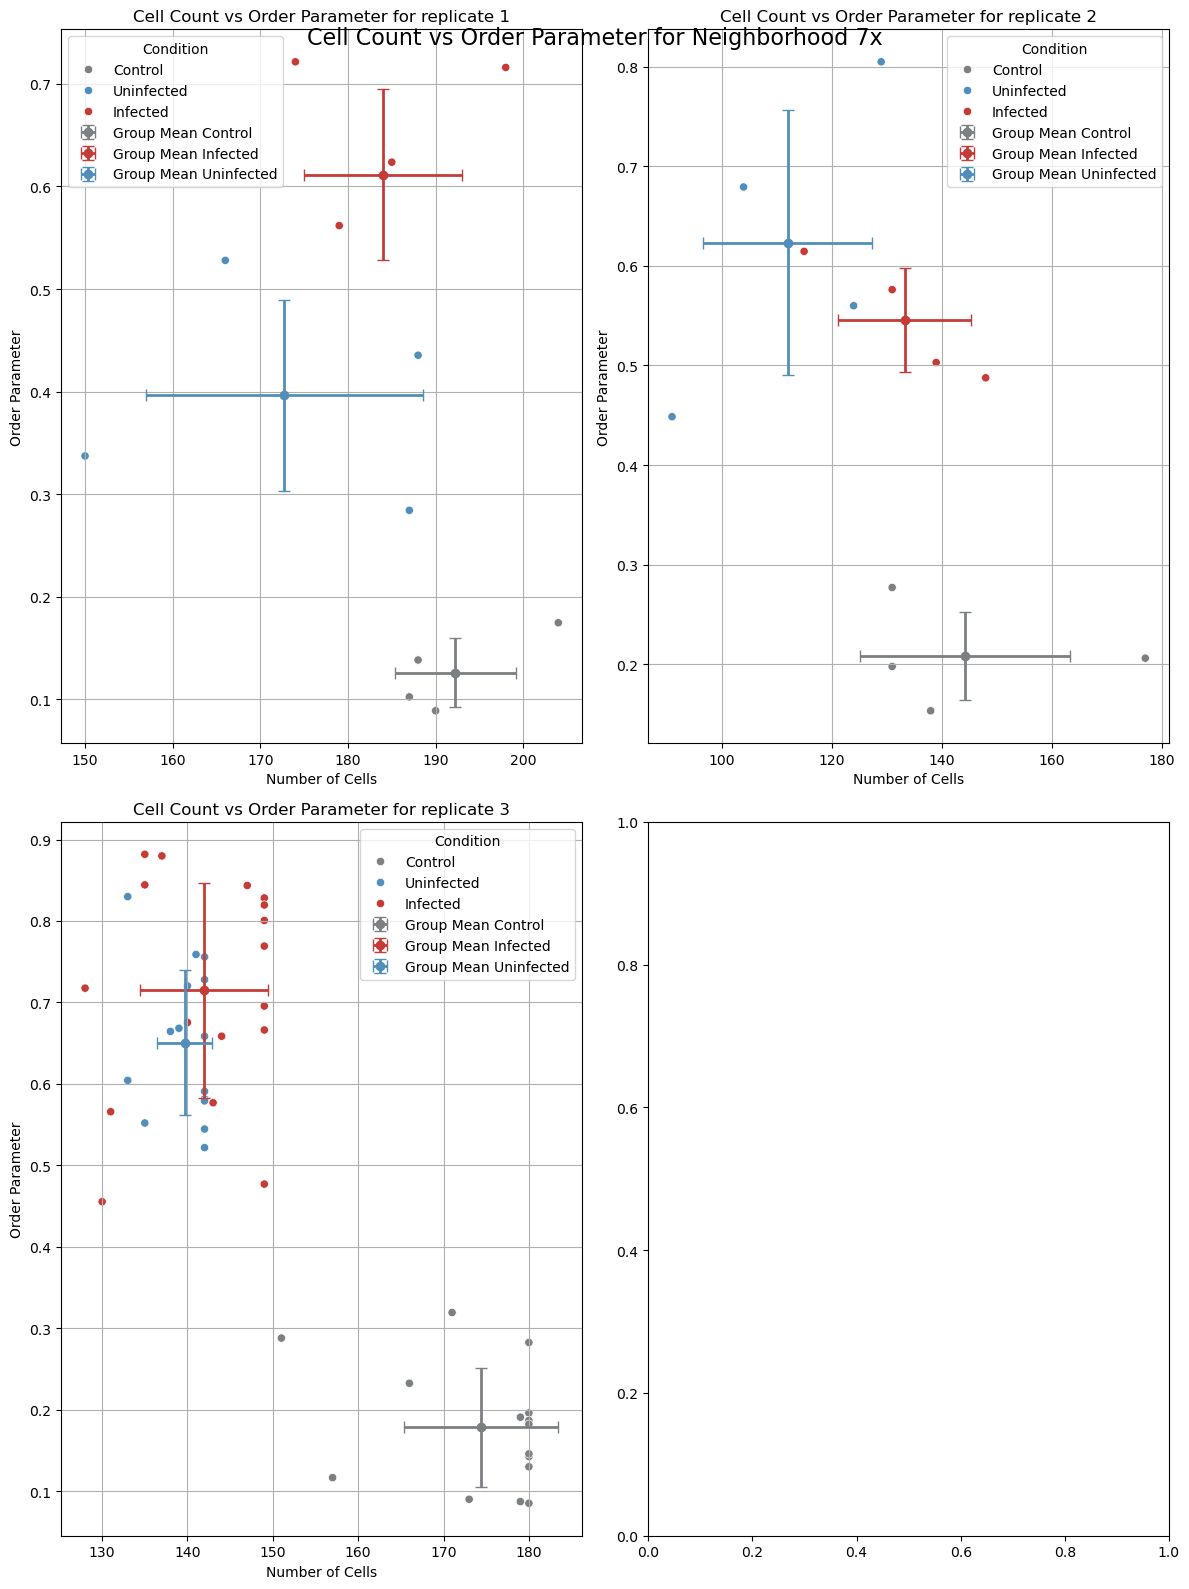

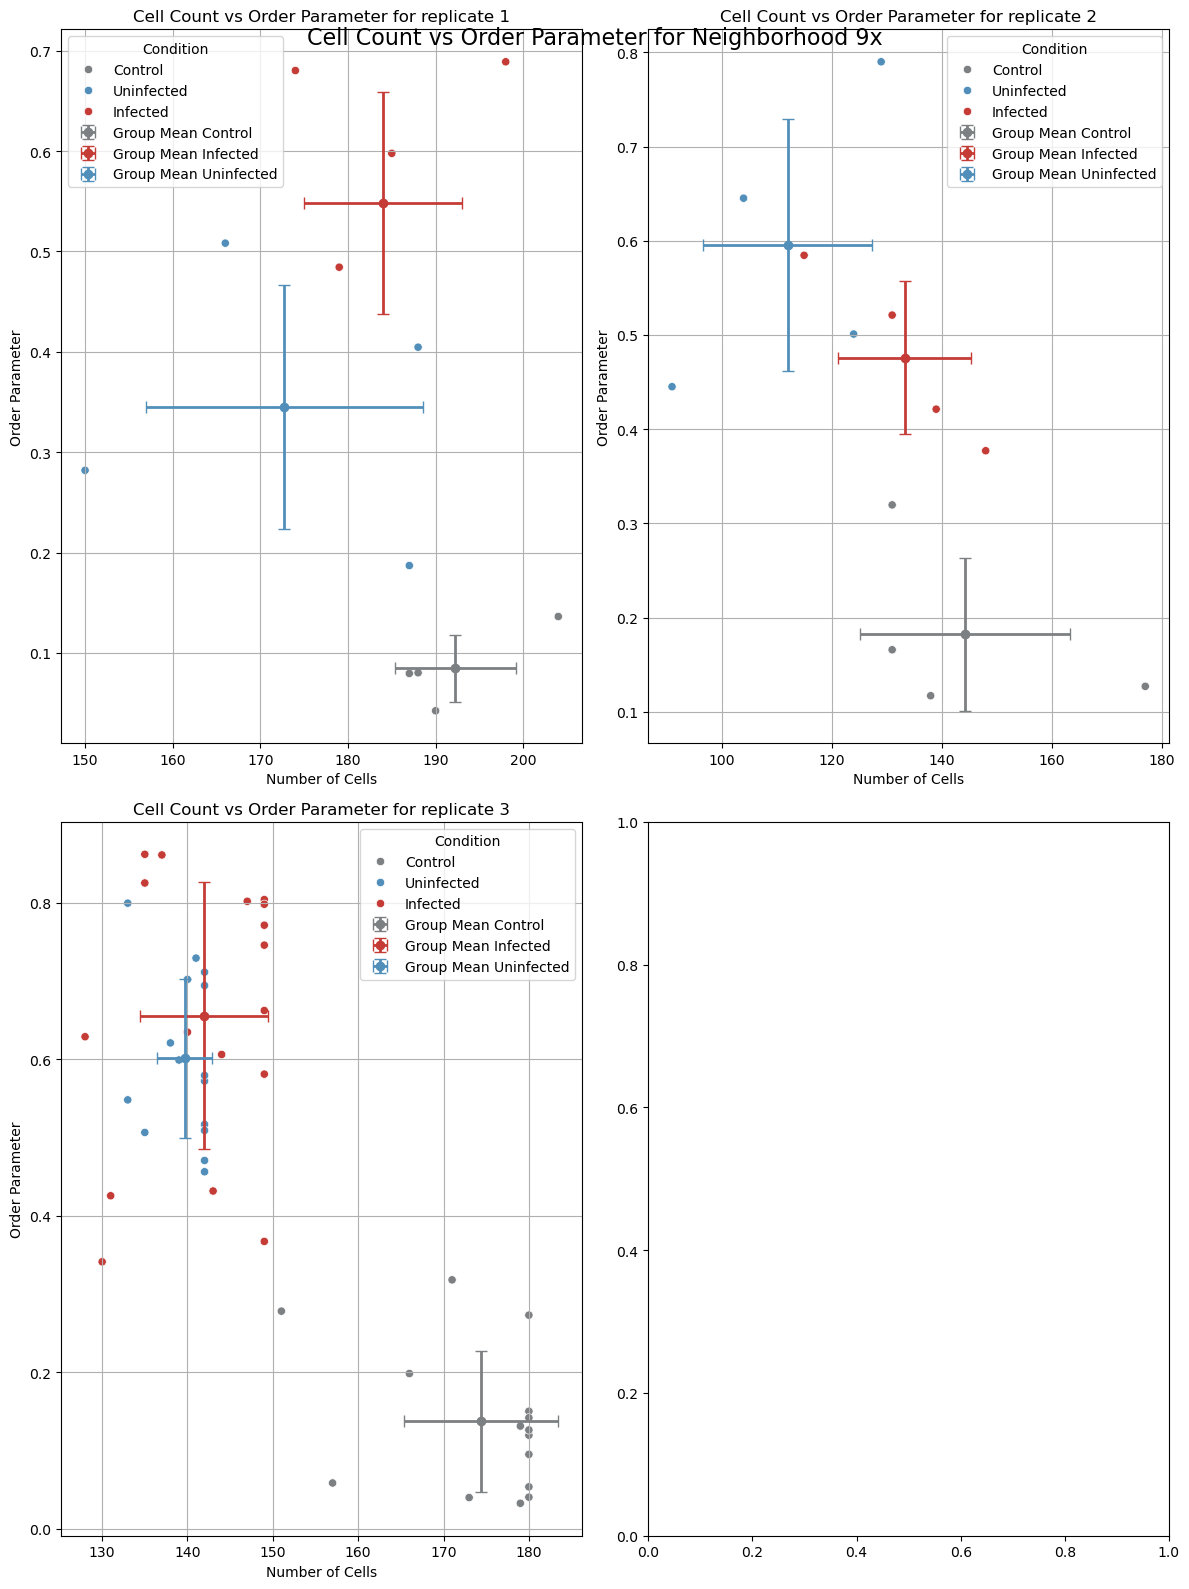

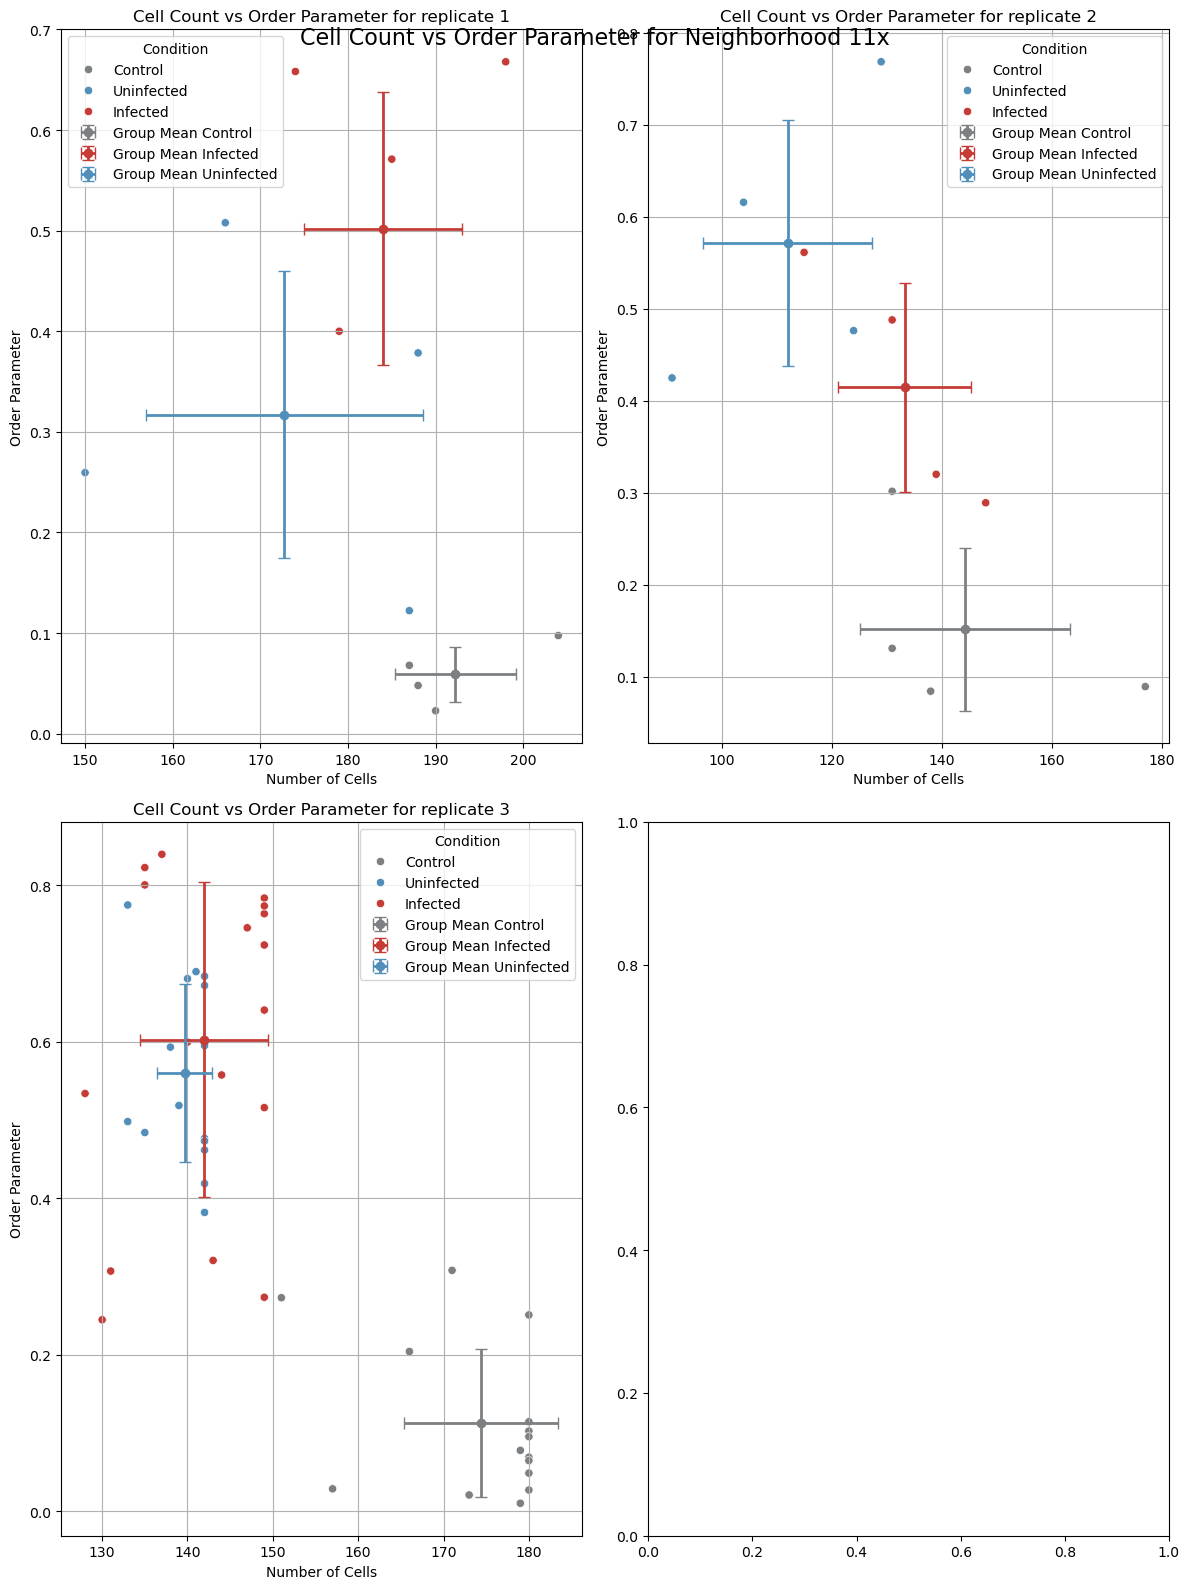

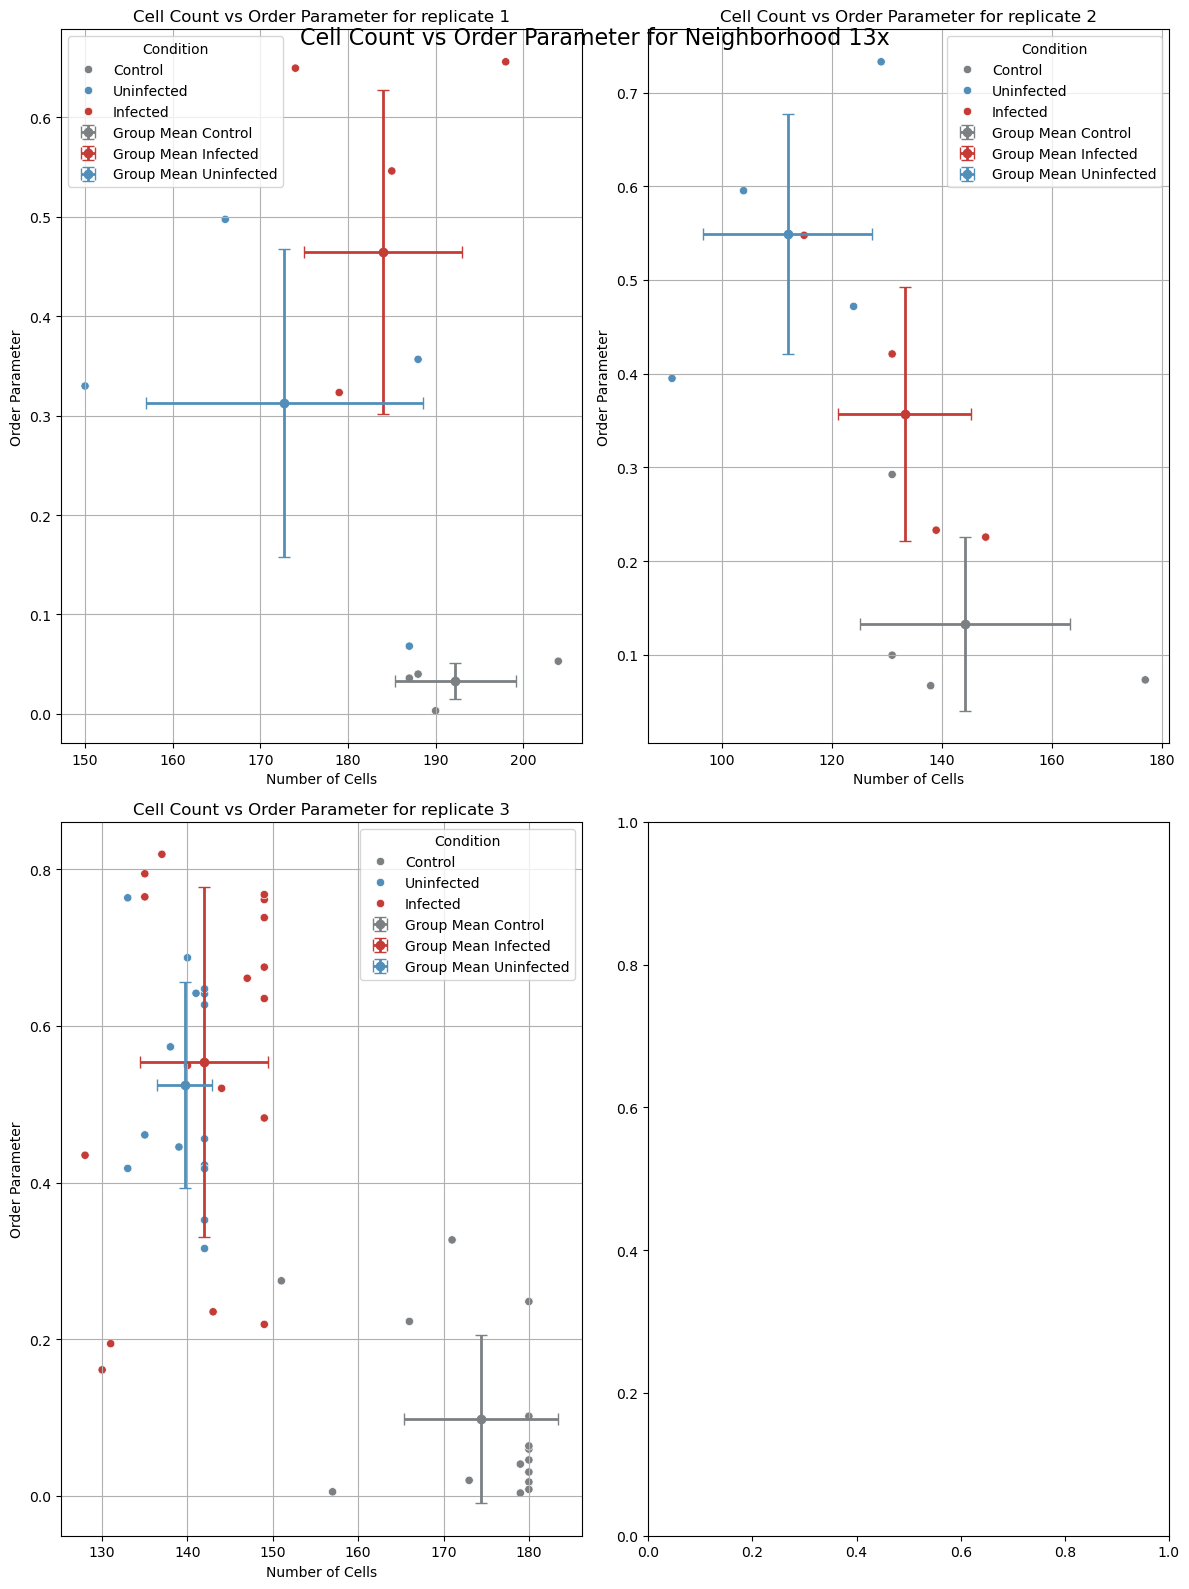

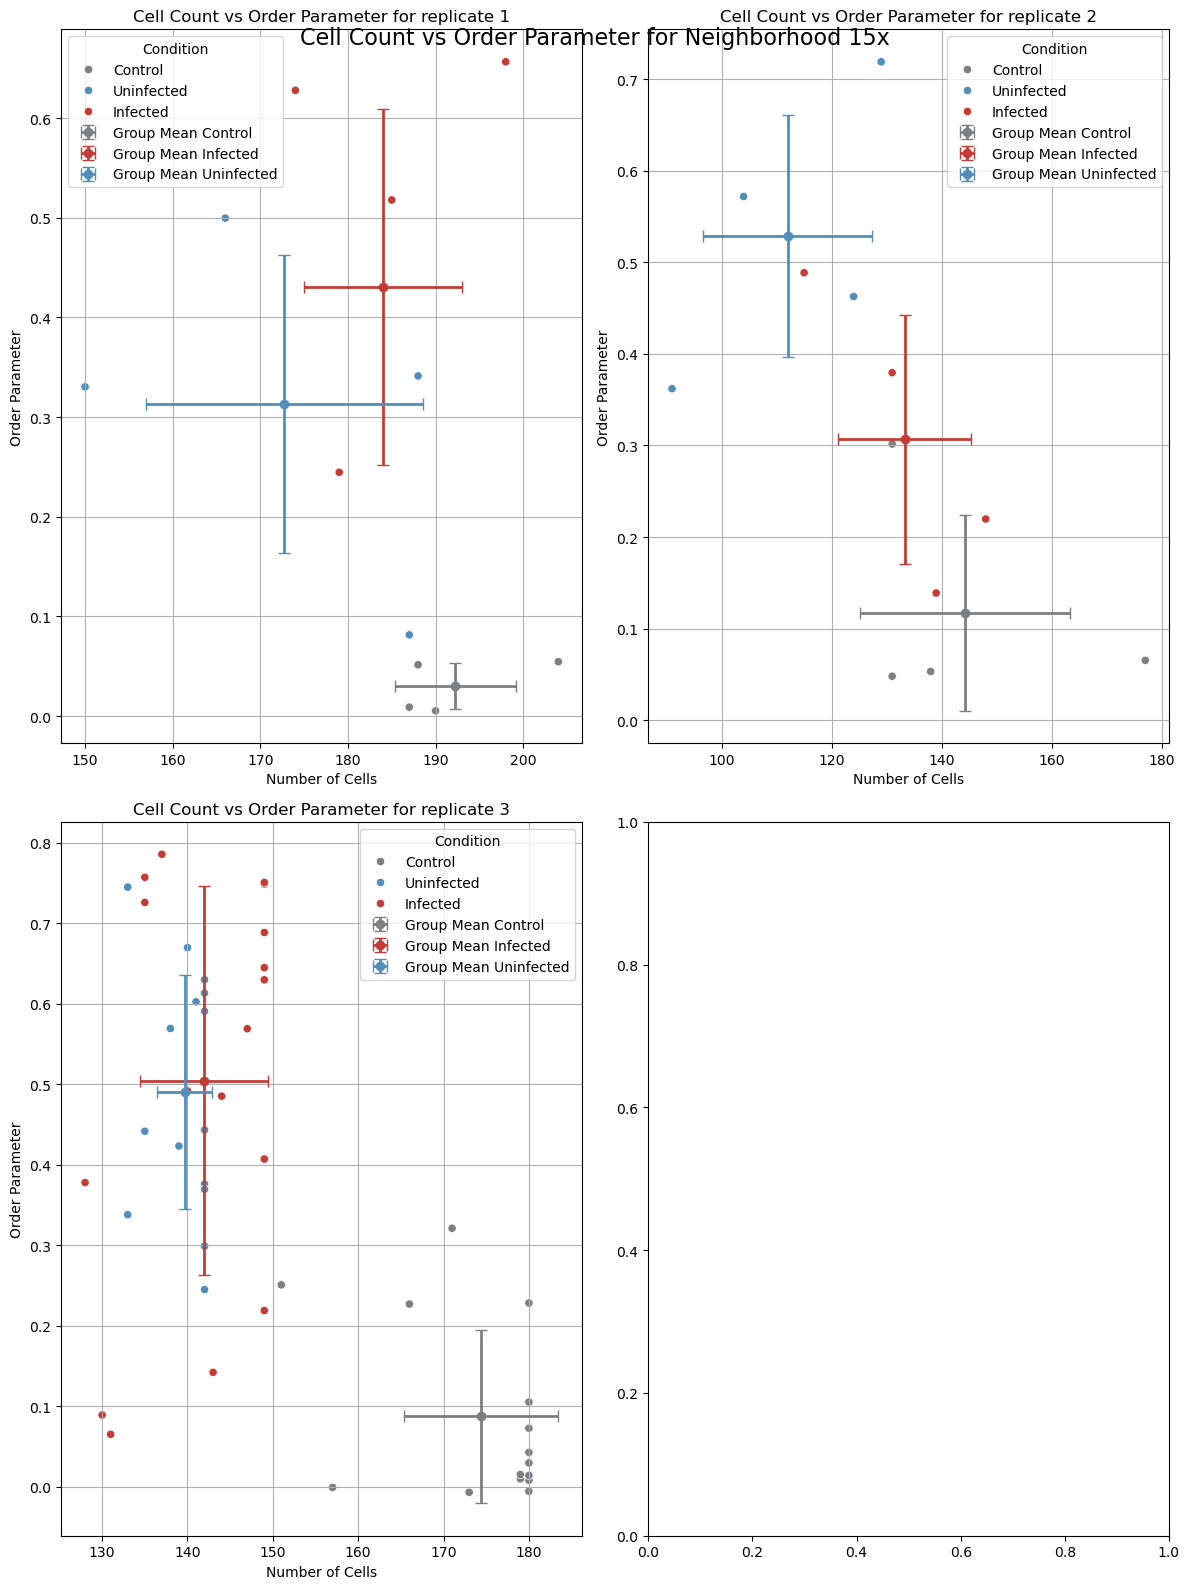

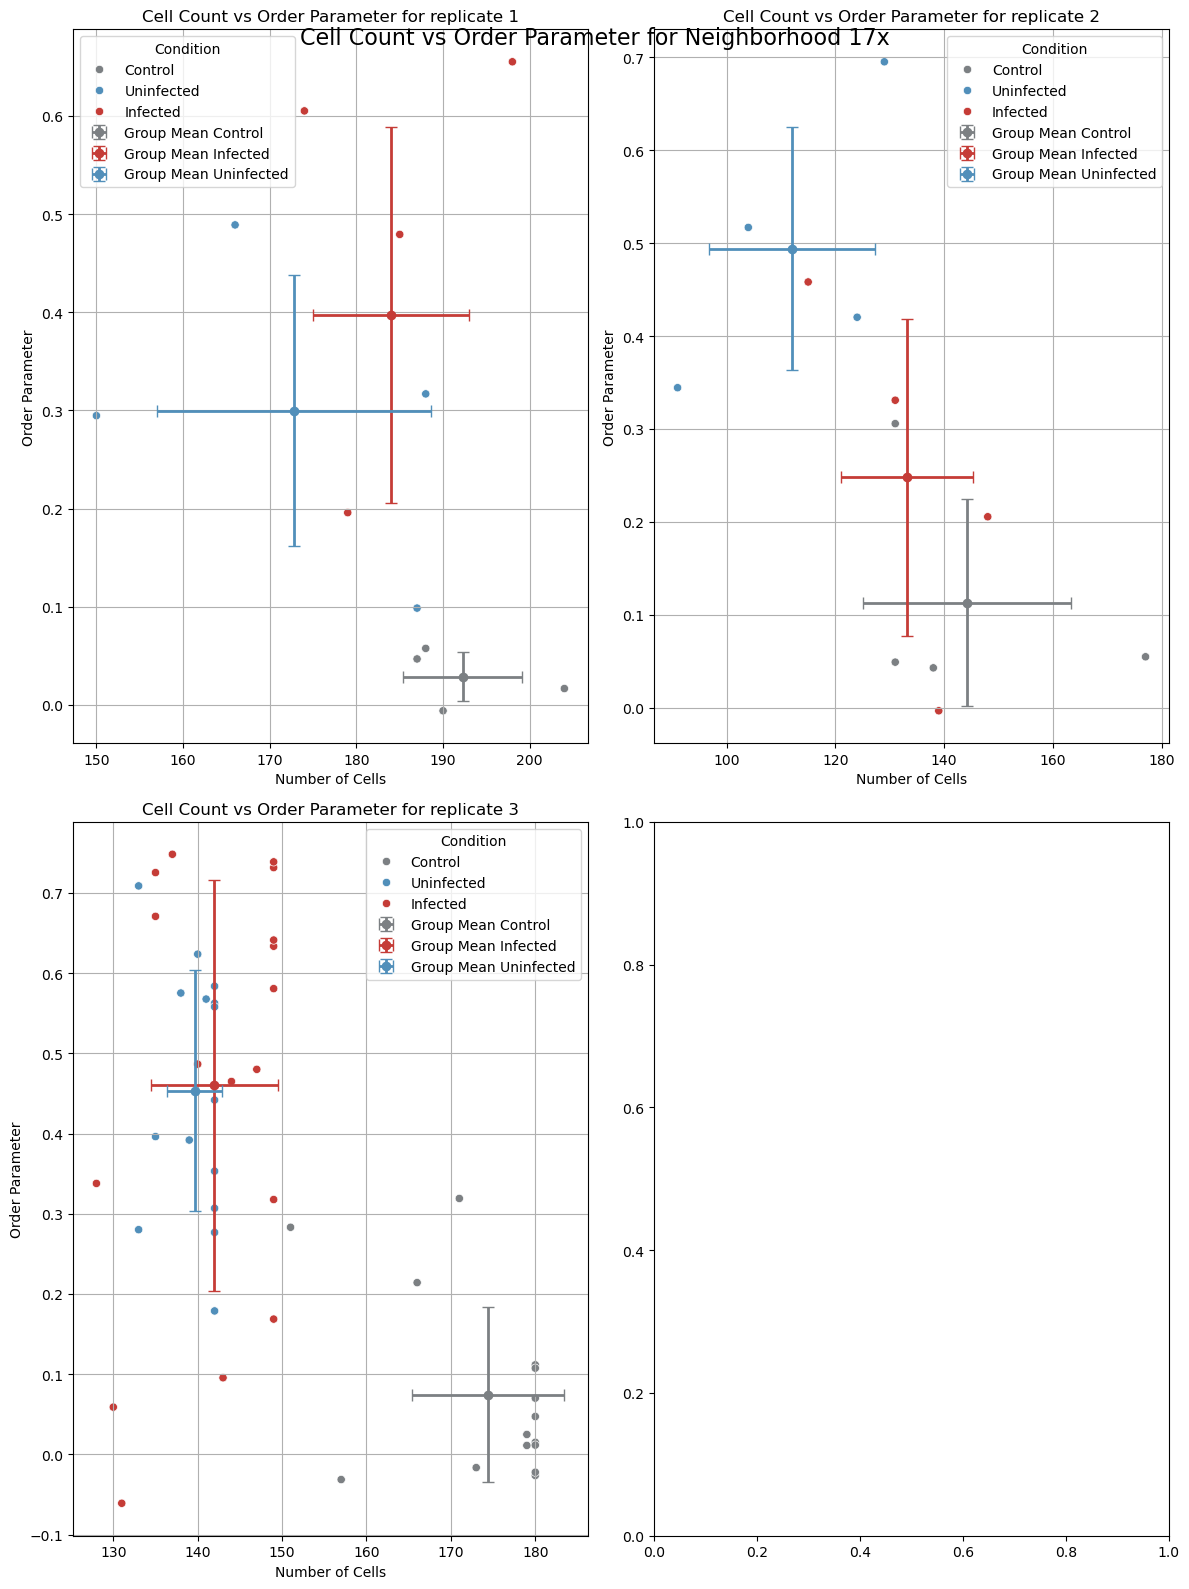

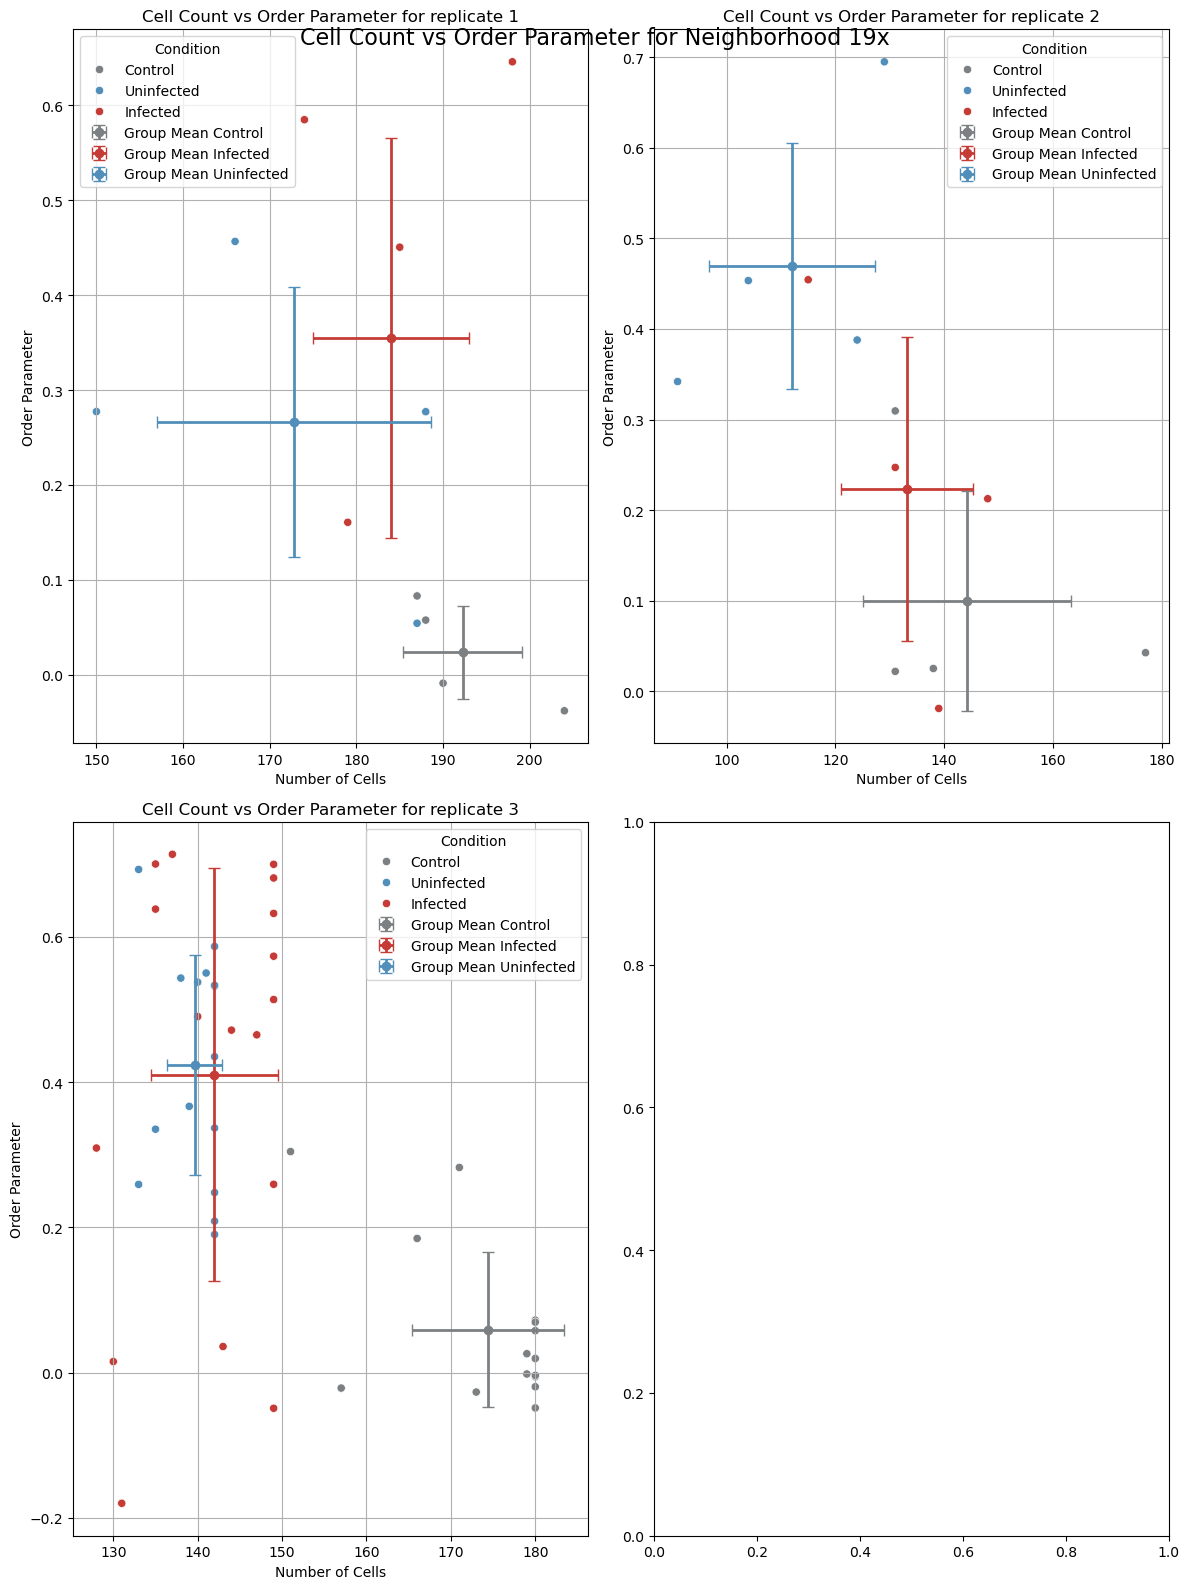

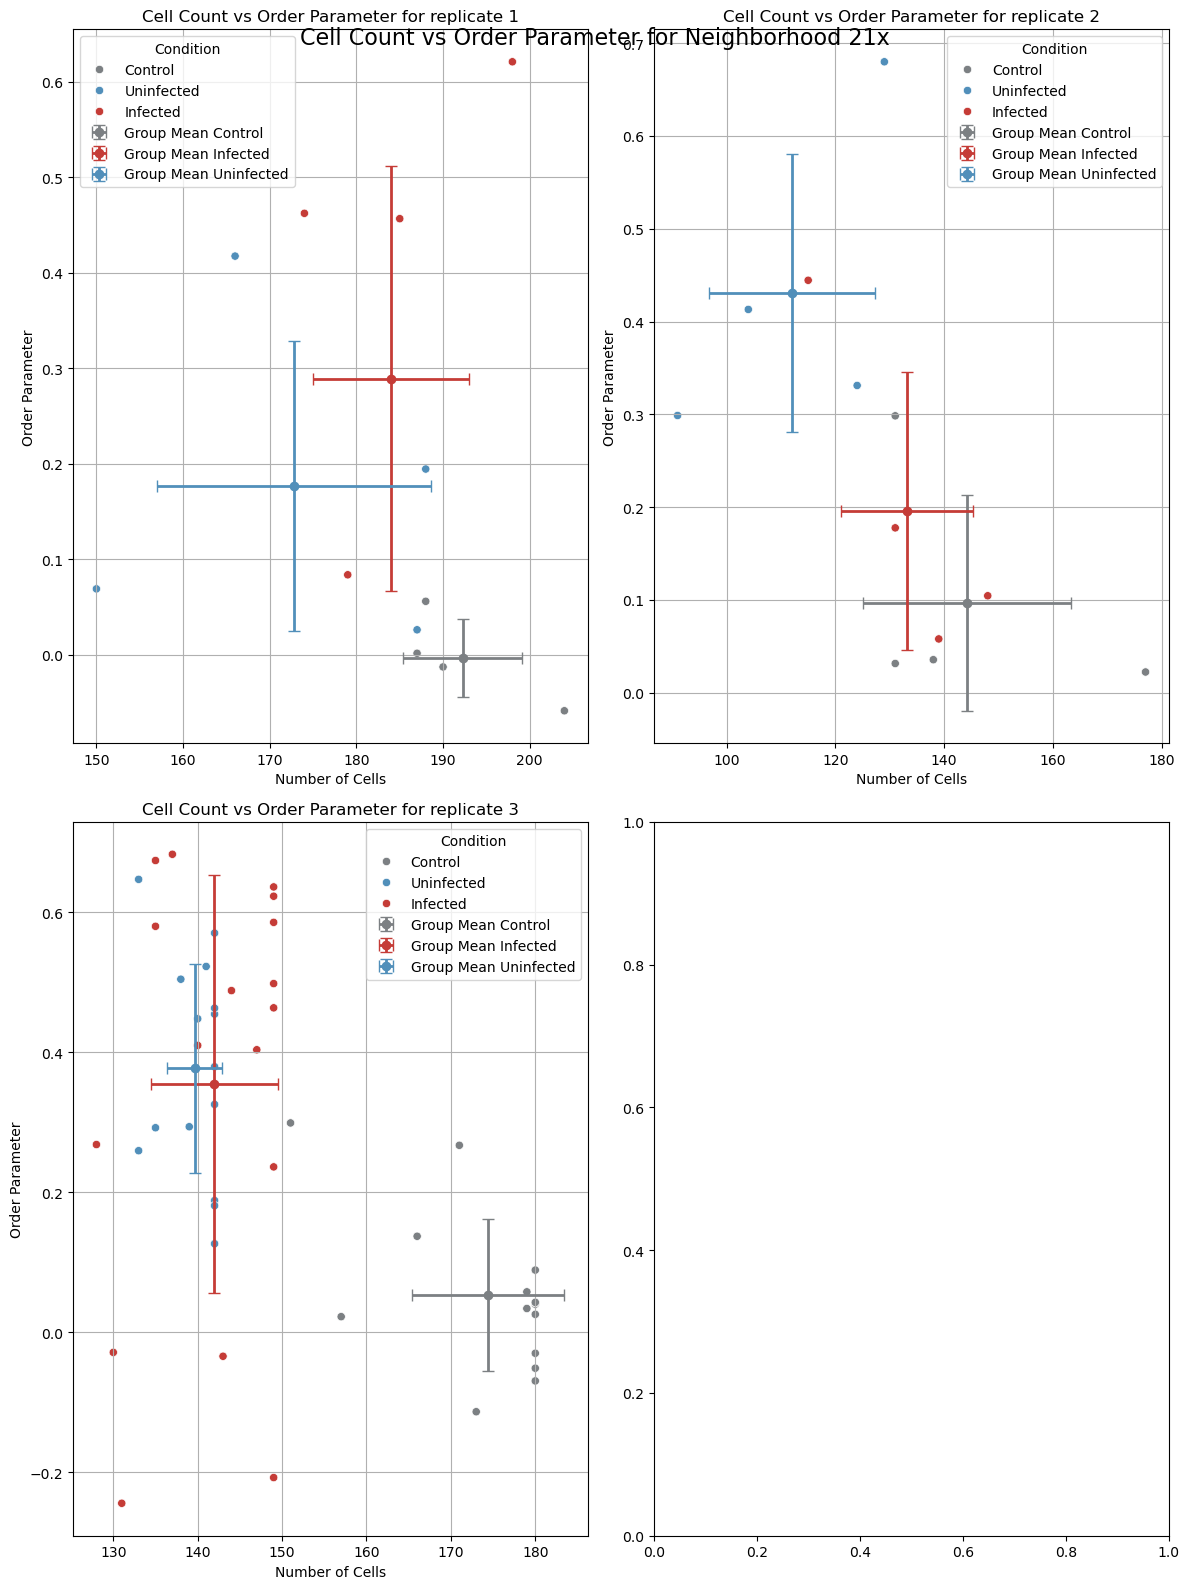

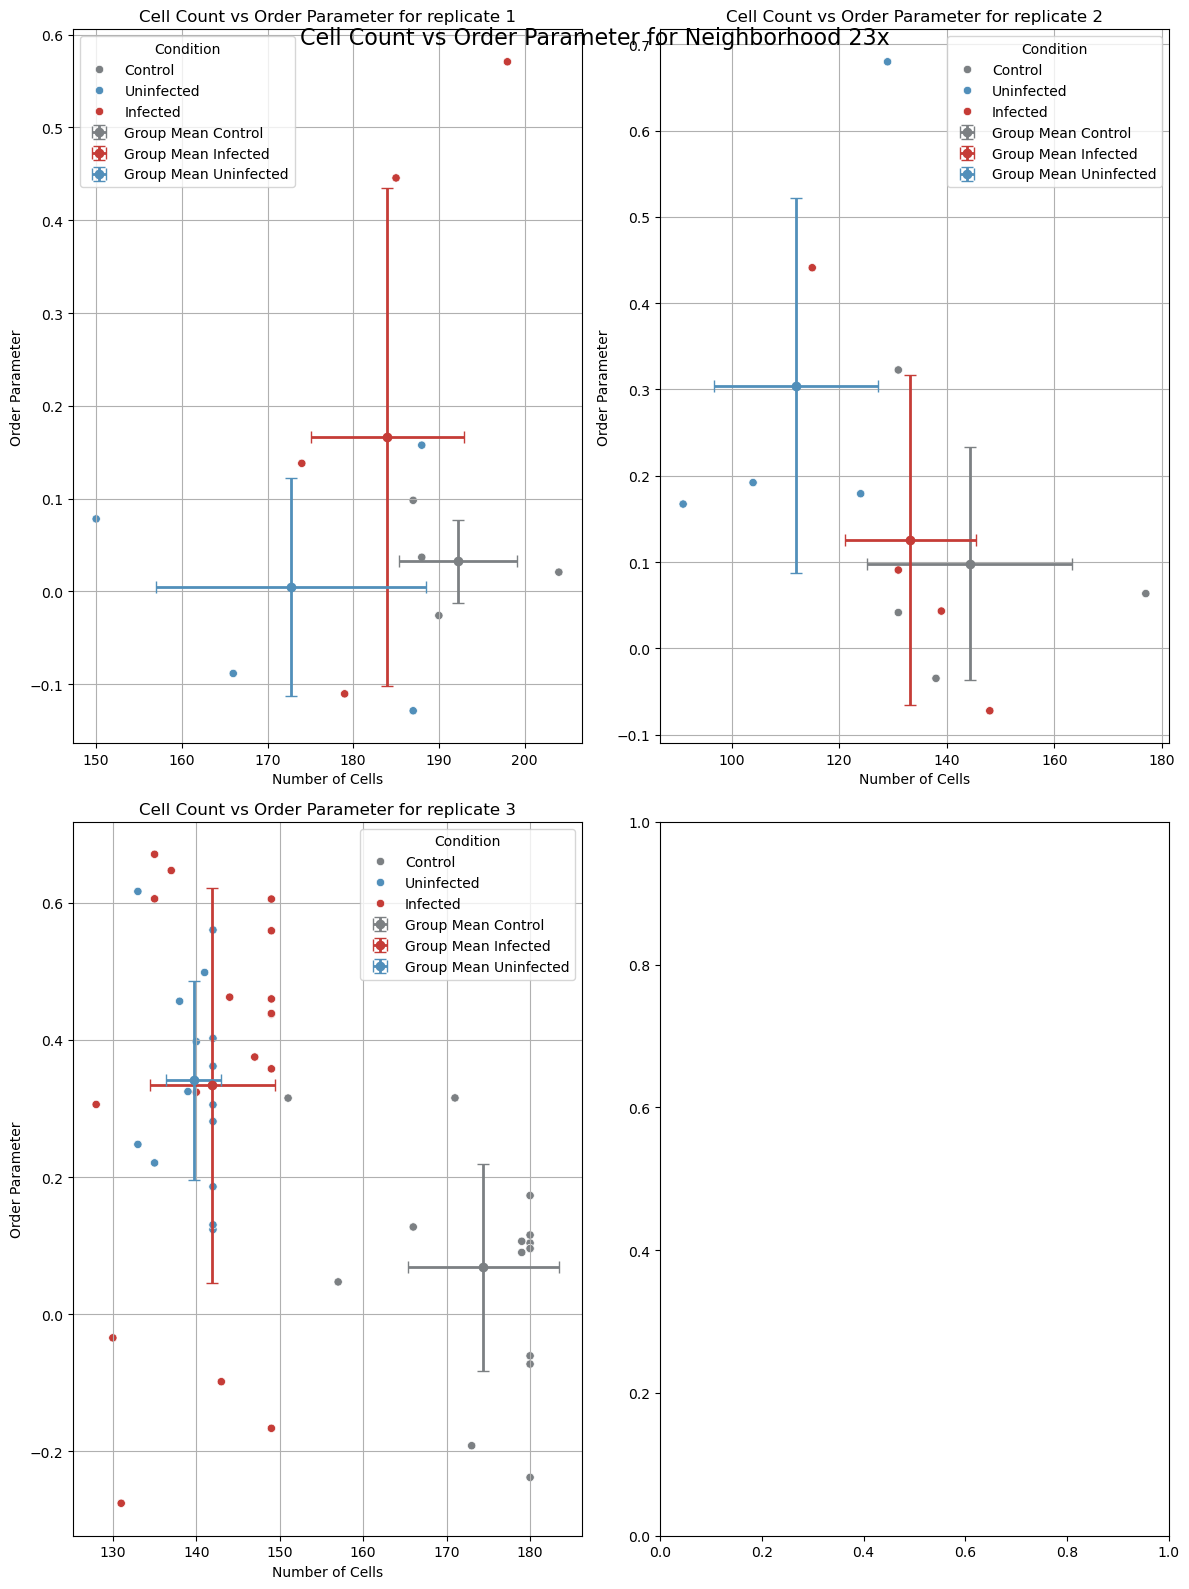

In [14]:
# Get unique neighborhoods
replicate = df_combined['replicate'].unique()
for neighborhood in neighborhoods:
    # Create subplots
    fig, axes = plt.subplots(nrows=len(replicate) // 2 + len(replicate) % 2, ncols=2, figsize=(12, 8 * (len(replicate) // 2 + len(replicate) % 2)))
    axes = axes.flatten()
    custom_palette = {
        'Control': '#7c8083',      # Control group color
        'Infected': '#c53c37',     # Infected group color
        'Uninfected': '#518fba'    # Uninfected group color
    }
    group_order = ['Control', 'Uninfected', 'Infected']

    # Loop through each neighborhood and create a plot
    for ax, rep in zip(axes, replicate):
        subset = df_combined[(df_combined['replicate'] == rep) & (df_combined['Neighbourhood'] == neighborhood)]
        
        # Scatter plot
        sns.scatterplot(data=subset, x='Number of cells', y='Order parameter', hue='Group', hue_order=group_order,
                    palette=custom_palette, ax=ax)
        
        # Line plot
        #sns.lineplot(data=subset, x='Number of cells', y='Order parameter', hue='Group', palette='deep', legend=False, ax=ax)
        
        # Calculate mean and standard deviation for error bars
        
        # Add error bars
        for group in subset['Group'].unique():
            group_mask = subset[subset['Group'] == group]
            mean_x = np.mean(group_mask['Number of cells'])
            mean_y = np.mean(group_mask['Order parameter'])
            std_x = np.std(group_mask['Number of cells'])
            std_y= np.std(group_mask['Order parameter'])

            ax.errorbar(mean_x, mean_y, xerr=std_x, yerr=std_y, fmt='o', color=custom_palette[group], 
                    ecolor=custom_palette[group], elinewidth=2, capsize=4, label=f'Group Mean {group}')

        
        # Customize the plot
        ax.set_title(f'Cell Count vs Order Parameter for replicate {rep}')
        ax.set_xlabel('Number of Cells')
        ax.set_ylabel('Order Parameter')
        ax.legend(title='Condition')
        ax.grid(True)

    # Adjust layout
    plt.tight_layout()
    fig.suptitle(f'Cell Count vs Order Parameter for Neighborhood {neighborhood}', fontsize=16)
    plt.show()

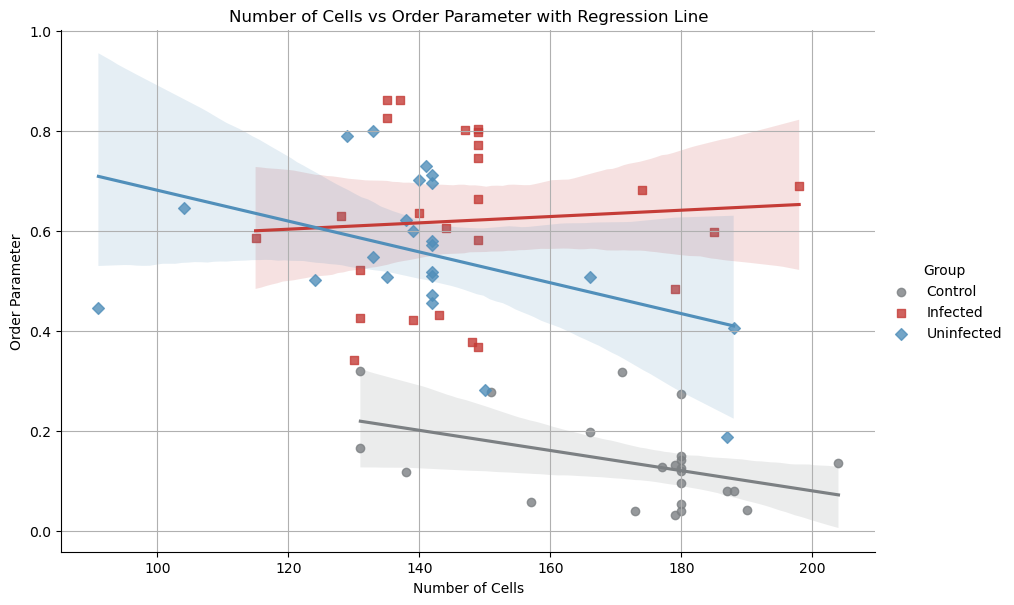

R-squared for Control: 0.1836
R-squared for Infected: 0.0052
R-squared for Uninfected: 0.1812


In [18]:
from sklearn.linear_model import LinearRegression
df_combined = df_combined[df_combined['Neighbourhood'] == '9x']

# Plot number ofo cells against order parameter with regression line
sns.lmplot(x='Number of cells', y='Order parameter', hue='Group', data=df_combined, 
           palette=custom_palette, height=6, aspect=1.5, markers=['o', 's', 'D'])

# Customize the plot
plt.title('Number of Cells vs Order Parameter with Regression Line')
plt.xlabel('Number of Cells')
plt.ylabel('Order Parameter')
plt.grid(True)
plt.show()

# Calculate R-squared value for each group
r2_scores = {}
for group in df_combined['Group'].unique():
    subset = df_combined[df_combined['Group'] == group].dropna(subset=['Number of cells', 'Order parameter'])
    X = subset['Number of cells'].values.reshape(-1, 1)
    y = subset['Order parameter'].values
    model = LinearRegression().fit(X, y)
    r2_scores[group] = model.score(X, y)

# Print R-squared values
for group, r2 in r2_scores.items():
    print(f'R-squared for {group}: {r2:.4f}')